### RLab01 - Martina Cacciola (2097476)

## Exercise 1

### a)

The posterior mean for a prior uniform distribution is: 5.636364
The posterior median is: 5.60609
The posterior variance is: 0.5123967

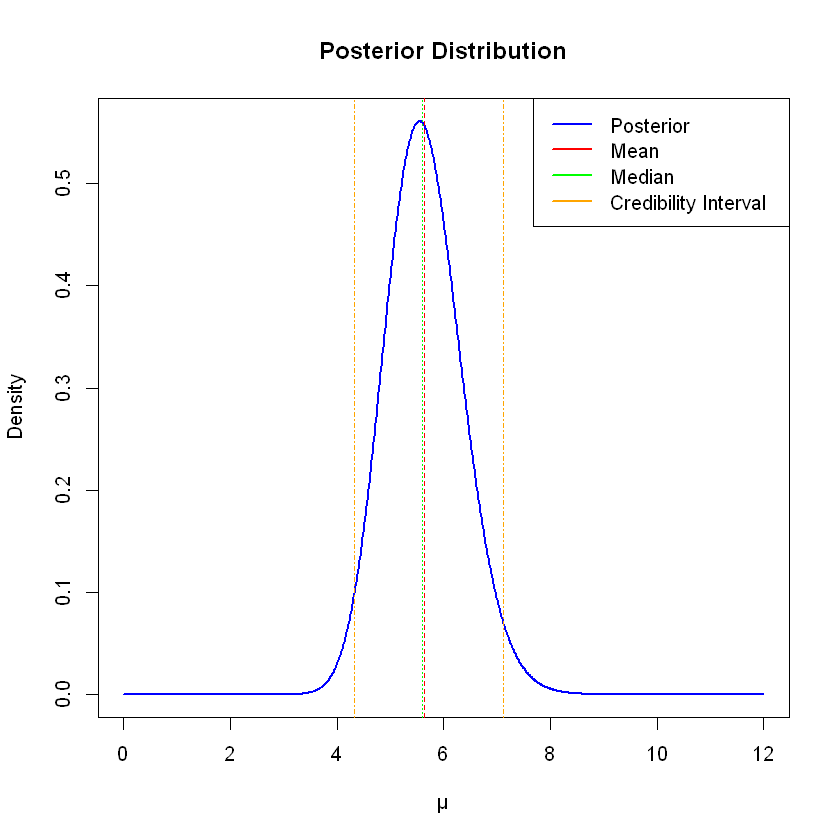

In [21]:
# Observed data
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- length(y)

# Prior: Uniform distribution
a <- 1
b <- 1
# Posterior distribution
a.post1 <- a + sum(y)
b.post1 <- b + n
# Posterior mean
mean.post1 <- a.post1 / b.post1
# Posterior median
median.post1 <- qgamma(0.5, shape = a.post1, rate = b.post1)
# Posterior variance
var.post1 <- a.post1 / (b.post1^2)
cat("The posterior mean for a prior uniform distribution is:", mean.post1)
cat("\nThe posterior median is:", median.post1)
cat("\nThe posterior variance is:", var.post1)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post1, rate = b.post1)
upper_bound <- qgamma(0.975, shape = a.post1, rate = b.post1)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post1, rate = b.post1)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post1, lty = 2, col = "red")
abline(v = median.post1, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topright", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### b)

The posterior mean for a Jeffrey's prior is: 8.375
The posterior median is: 8.34169
The posterior variance is: 0.8375

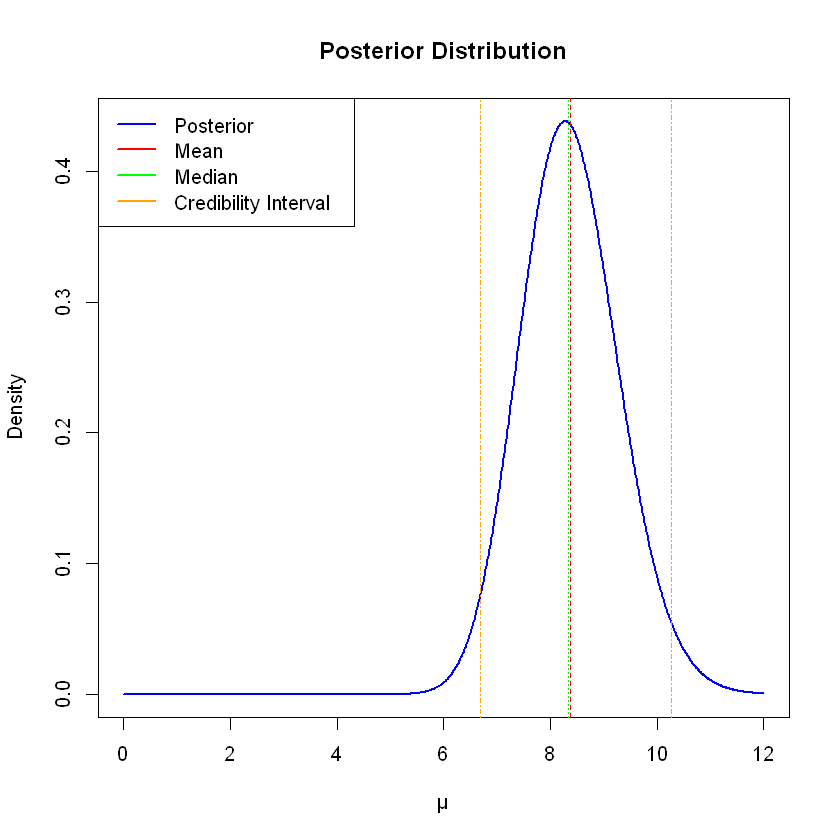

In [22]:
# Jeffreys' prior
a <- 0.5
b <- 0
# posterior distribution
a.post2 <- a + sum(y)
b.post2 <- b + n
# posterior mean
mean.post2 <- a.post2 / b.post2
# posterior median
median.post2 <- qgamma(0.5, shape = a.post2, rate = b.post2)
# posterior variance
var.post2 <- a.post2 / (b.post2^2)
cat("The posterior mean for a Jeffrey's prior is:", mean.post2)
cat("\nThe posterior median is:", median.post2)
cat("\nThe posterior variance is:", var.post2)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post2, rate = b.post2)
upper_bound <- qgamma(0.975, shape = a.post2, rate = b.post2)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post2, rate = b.post2)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post2, lty = 2, col = "red")
abline(v = median.post2, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topleft", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### c)

In [25]:
# 95% credibility interval for Uniform prior
ci.uniform <- qgamma(c(0.025,0.975), shape = a.post1, rate = b.post1)

# 95% credibility interval for Jeffrey's prior
ci.jeffreys <- qgamma(c(0.025,0.975), shape = a.post2, rate = b.post2)

# Normal approximation of posterior distribution
ci_unif_norm <- qnorm(c(0.025, 0.975), mean = mean.post1, sd = sqrt(var.post1))
ci_jeff_norm <- qnorm(c(0.025, 0.975), mean = mean.post2, sd = sqrt(var.post2))

cat("95% credibility interval using uniform prior:", ci.uniform, "\n")
cat("95% credibility interval using Jeffreys' prior:", ci.jeffreys, "\n")
cat("95% confidence interval using normal approximation (uniform prior):", ci_unif_norm, "\n")
cat("95% confidence interval using normal approximation (Jeffrey's prior):", ci_jeff_norm)

95% credibility interval using uniform prior: 4.321368 7.123368 
95% credibility interval using Jeffreys' prior: 6.677847 10.26142 
95% confidence interval using normal approximation (uniform prior): 4.233384 7.039343 
95% confidence interval using normal approximation (Jeffrey's prior): 6.581338 10.16866

## Exercise 2

### a)

Let `H` be the event of a patient having the disease, and `F` be the event of the new method failing to detect the disease. We know that `P(F|H) = 0.15`. Therefore, `P(D|H) = 0.85`, i.e., the probability of detecting the disease (event `D`) given that the patient has the disease.

A random sample of `n = 75` patients known to have the disease is screened using the new method. Let `Y` be the number of times the new method fails to detect the disease in this sample. Then `Y` has a **binomial** distribution with parameters `n = 75` and `p = 0.15`.

In [1]:
#number of trials
n <- 75
p <- 0.15
#number of failures
y <- 0:n
# probability distribution of failure
prob_y <- dbinom(y, size = n, prob = p)

### b)

If `y` is the number of patients in which the method fails to detect the disease and `n` is the total number of patients in the sample, then the frequentist estimator of the failure probability is given by:
$ \hat{p}=\frac{y}{n} $

In [2]:
y <- 6
# failure probability (frequentist estimator) 
p_hat <- y/n
cat("The frequentist estimation of the failure probability is:", p_hat*100, "%")

The frequentist estimation of the failure probability is: 8 %

### c)

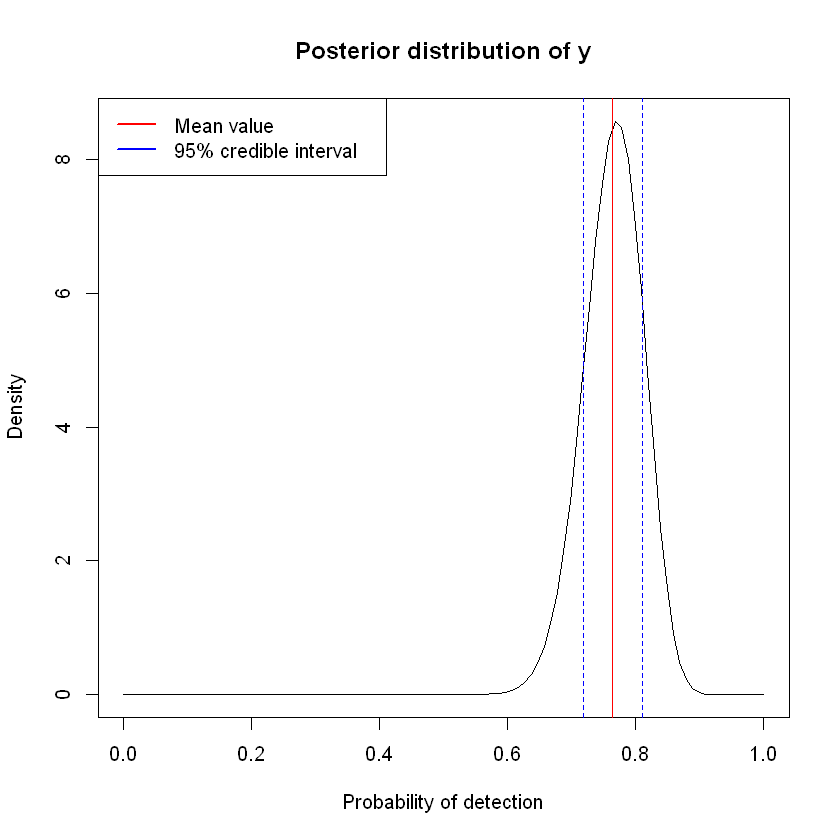

In [3]:
# Set the prior distribution parameters
alpha <- 0.15^2 / 0.14^2
beta <- alpha * (1 - 0.15) / 0.15

# Set the sample size and number of successes
n <- 75
y <- rbinom(1, n, 0.85)

# Compute the posterior distribution
posterior_alpha <- alpha + y
posterior_beta <- beta + n - y

# Compute the posterior mean and variance
posterior_mean <- posterior_alpha / (posterior_alpha + posterior_beta)
posterior_variance <- (posterior_alpha * posterior_beta) / ((posterior_alpha + posterior_beta)^2 * (posterior_alpha + posterior_beta + 1))

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, posterior_alpha, posterior_beta)
plot(x, posterior, type = "l", xlab = "Probability of detection", ylab = "Density", main = "Posterior distribution of y")
abline(v = posterior_mean, col = "red")
abline(v = posterior_mean + sqrt(posterior_variance), col = "blue", lty = "dashed")
abline(v = posterior_mean - sqrt(posterior_variance), col = "blue", lty = "dashed")
legend("topleft", c("Mean value", "95% credible interval"),
       col = c("red", "blue"), lwd = 2)

### d) Bayesian paradigm

Cannot reject the null hypothesis: The new test is no better than the traditional method.


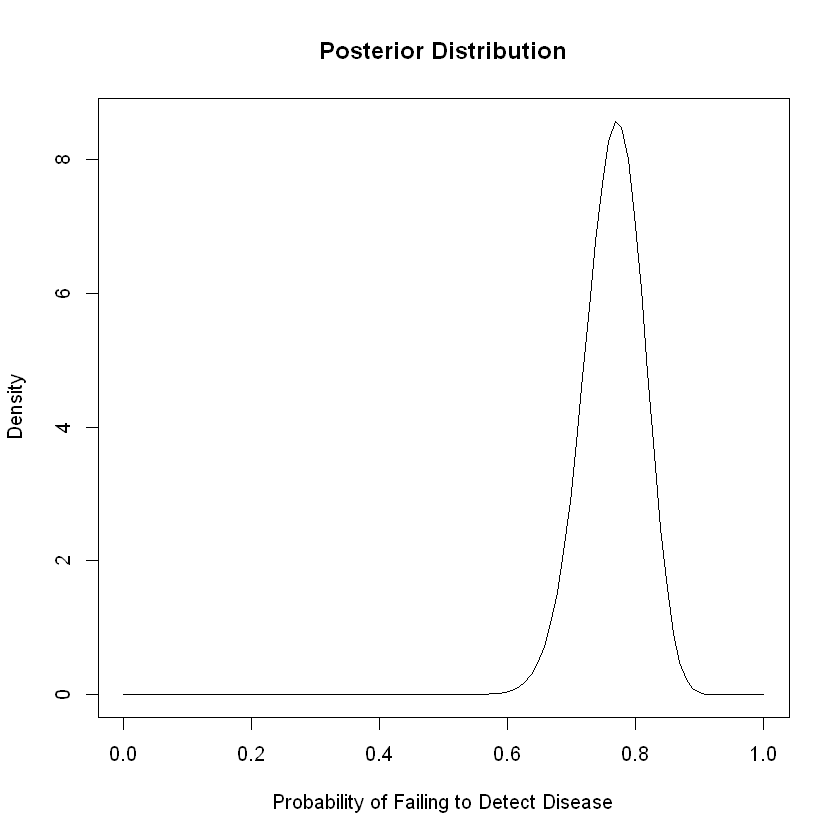

In [16]:
# Calculate the posterior probability
# The probability of failing is greater or equal to 15% = NULL hypothesis
posterior_prob <- pbeta(0.15, posterior_alpha, posterior_beta, lower.tail = FALSE)

# Perform the hypothesis test with 5% level of significance
if (posterior_prob <= 0.05) {
  cat("Reject the null hypothesis: The new test is better than the traditional method.\n")
} else {
  cat("Cannot reject the null hypothesis: The new test is no better than the traditional method.\n")
}

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, posterior_alpha, posterior_beta)
plot(x, posterior, type = "l", main = "Posterior Distribution", xlab = "Probability of Failing to Detect Disease", ylab = "Density")

# Add a shaded region to the plot
x_fill <- c(0.15, x[x >= 0.15])
y_fill <- c(0, posterior[x >= 0.15])
#polygon(x_fill, y_fill, col = "red", border = NA)

### e) Frequentist paradigm

We perform a binomial test with the null hypothesis that the probability of failing to detect the disease in ill patients is greater than or equal to 15% (`p = 0.15`).

The p-value of the test is 1 
Cannot reject the null hypothesis: The new test is no better than the traditional method.


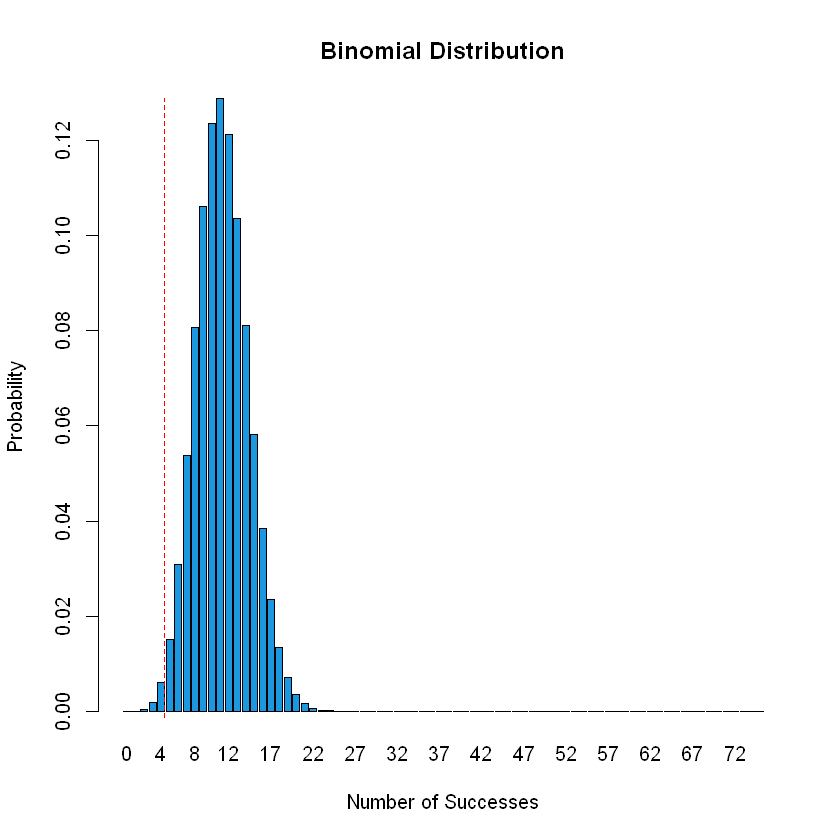

In [14]:
# Perform the binomial test
test_result <- binom.test(y, n, p = 0.15, alternative = "less")

# Report the result of the test
cat("The p-value of the test is", test_result$p.value, "\n")
if (test_result$p.value <= 0.05) {
  cat("Reject the null hypothesis: The new test is better than the traditional method.\n")
} else {
  cat("Cannot reject the null hypothesis: The new test is no better than the traditional method.\n")
}

# Plot the binomial distribution
x <- 0:n
prob <- dbinom(x, n, 0.15)
barplot(prob, names.arg = x, main = "Binomial Distribution", col = "#1b98e0", xlab = "Number of Successes", ylab = "Probability")

# Add a line dividing the acceptance and rejection regions
critical_value <- qbinom(0.05, n, 0.15)
abline(v = critical_value, col = "red", lty = 2)

This plot shows the binomial distribution under the null hypothesis that the probability of failing to detect the disease in ill patients is greater than or equal to 15%, and highlights the critical value in red (the largest number of successes for which we cannot reject the null hypothesis at a given significance level). The area to the left of this line represents the acceptance region of the test, where we cannot reject the null hypothesis at a significance level of 0.05. The area to the right instead represents the rejection region of the test.

## Exercise 3

The posterior probability for each combination of $\alpha$ and $\beta$ is computed by multiplying the likelihood of the data given $\alpha$ and $\beta$, with the prior probability, which is assumed to be uniform over the range of values for $\alpha$ and $1/\sqrt \beta$ over the range of values for $\beta$. The $1/4\pi$ term represents a uniform prior over the azimuth angle.

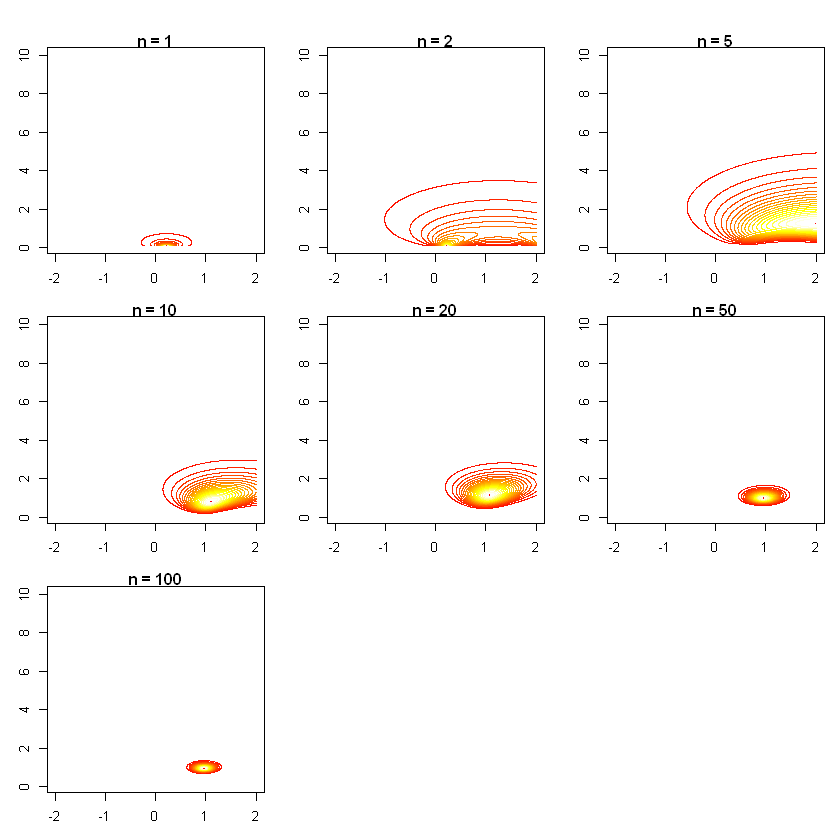

In [6]:
# Likelihood function
likelihood <- function(x, alpha, beta) {
  return(prod(1 / pi * beta / (beta^2 + (x - alpha)^2)))
}

# Posterior function
posterior <- function(x, alpha_range, beta_range, n) {
  alpha_grid <- seq(min(alpha_range), max(alpha_range), length.out = 1000)
  beta_grid <- seq(min(beta_range), max(beta_range), length.out = 1000)
  posterior_grid <- matrix(0, nrow = length(alpha_grid), ncol = length(beta_grid))
  for (i in 1:length(alpha_grid)) {
    for (j in 1:length(beta_grid)) {
      posterior_grid[i,j] <- likelihood(x[1:n], alpha_grid[i], beta_grid[j]) * 1/(4*pi) * 1/sqrt(beta_grid[j])
    }
  }
  posterior_grid <- posterior_grid / sum(posterior_grid)
  return(list(alpha = alpha_grid, beta = beta_grid, posterior = posterior_grid))
}


# Generate sample data
set.seed(123)
beta_true <- 1
alpha_true <- 1
x <- alpha_true + beta_true * tan(runif(1000, -pi/2, pi/2))

# Plot posterior for different sample sizes
sample_sizes <- c(1, 2, 5, 10, 20, 50, 100)
par(mfrow=c(3,3), mar=c(3,3,1,1), oma=c(0,0,2,0))
for (i in 1:length(sample_sizes)) {
  n <- sample_sizes[i]
  post <- posterior(x, alpha_range = c(-2, 2), beta_range = c(0.1, 10), n = n)
  contour(post$alpha, post$beta, post$posterior, main = paste("n =", n), xlab = expression(alpha), ylab = expression(beta), col = heat.colors(20), levels = seq(0, max(post$posterior), length.out = 20+1), drawlabels = FALSE)
}
mtext(expression(paste("Posterior Distribution for ", alpha, " and ", beta)), outer = TRUE, cex = 1.5, font = 2, line = 2)